In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('expenses.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.shape

(1338, 7)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:xlabel='bmi', ylabel='Count'>

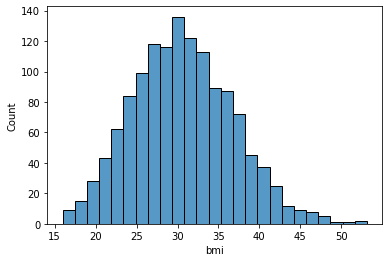

In [15]:
sns.histplot(x=df['bmi'])

<AxesSubplot:xlabel='bmi'>

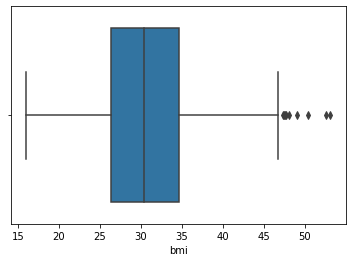

In [16]:
sns.boxplot(x=df['bmi'])

In [17]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])
df['sex'] = le.fit_transform(df['sex'])

In [23]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [25]:
df.rename(columns={'sex':'gender'},inplace = True)

In [26]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:xlabel='charges', ylabel='Count'>

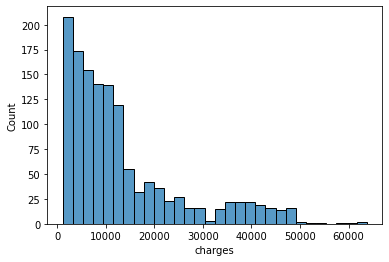

In [27]:
sns.histplot(x=df['charges'])

<AxesSubplot:xlabel='charges'>

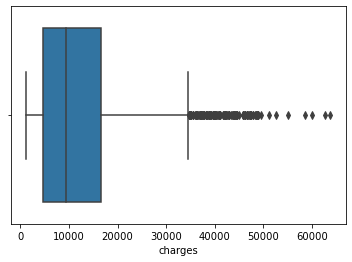

In [28]:
sns.boxplot(x=df['charges'])

In [31]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(df)
list(clusters).count(-1)

1162

## Handling the outliers

In [33]:
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [35]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [36]:
df['charges'] = df['charges'].apply(limit_imputer)

<AxesSubplot:xlabel='charges'>

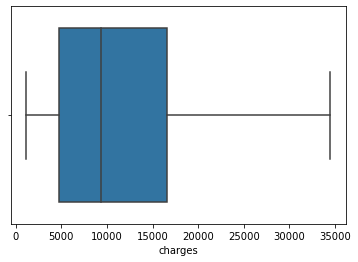

In [41]:
sns.boxplot(x=df['charges'])

In [43]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr

In [44]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [45]:
df['bmi'] = df['bmi'].apply(limit_imputer)

<AxesSubplot:xlabel='bmi'>

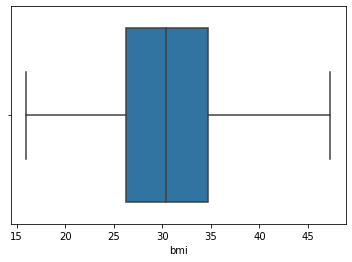

In [46]:
sns.boxplot(x=df['bmi'])

In [47]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [49]:
X = df.drop(['charges'],axis=1)

In [50]:
y = df['charges']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

## To check our model

In [64]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, predictions,squared=False)
print(errors)

5022.2975618971195


In [68]:
reg = LinearRegression().fit(X, y)
reg.score(X, y)

0.7476763409551578

## Trying Standard Scaler

In [81]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2)
lr = LinearRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

In [84]:
lr = LinearRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

In [86]:
reg = LinearRegression().fit(X_scaled, y)
reg.score(X_scaled, y)

0.7476763409551577

## Final Model

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score , accuracy_score

regressor = RandomForestRegressor(random_state=101)
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=101)

In [91]:
y_pred = regressor.predict(x_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_pred) )

Mean absolute error: 2544.26
Residual sum of squares (MSE): 21737053.44
R2-score: 0.78


In [92]:
reg = RandomForestRegressor().fit(X_scaled, y)
reg.score(X_scaled, y)

0.9702761248432639

In [93]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [95]:
df.describe()

,age,gender,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.650034,1.094918,0.204783,1.515695,12479.369251
std,14.049960,0.500160,6.056926,1.205493,0.403694,1.104885,10158.056096
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,47.290000,5.000000,1.000000,3.000000,34489.350562
